In [569]:
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.optimize as sc
import plotly.graph_objects as go

In [570]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData["Close"]
    starting_price = stockData.iloc[-1]
    starting_price = starting_price.values[0]
    returns = stockData.pct_change().dropna()
    meanReturns = returns.mean()
    mu = meanReturns.values[0] * 252
    sigma = returns.std() * np.sqrt(252)
    sigma = sigma.values[0]
    covMatrix = returns.cov()
    return mu, sigma, returns, starting_price

In [571]:
stock = ["NU"]
endDate = dt.datetime.now()
#startDate = endDate - dt.timedelta(days=900)
startDate = "2015-01-01"

In [572]:
mu, sigma, returns, starting_price = get_data(stock, startDate, endDate)
print(mu)
print(sigma)
print(starting_price)


[*********************100%***********************]  1 of 1 completed

0.27902919683679117
0.6207150390216714
14.229999542236328


## Montecarlo Simulation Method

In [573]:
mc_sims = 3000
num_days = 4

dates = pd.date_range(start=returns.index[-1], periods=num_days, freq="B")

In [574]:
# Create the simulation array
simulations = np.zeros((mc_sims, num_days))

In [575]:
# Create a Montecarlo Simulations
for i in range(mc_sims):
    daily_returns = np.random.normal(mu/num_days, sigma/np.sqrt(num_days), num_days)
    price_path = starting_price * np.cumprod(1 + daily_returns)
    simulations[i, :] = price_path

In [576]:
expected_price = simulations[:,-1].mean()
print(f'Expected price after {num_days} number of days: ${expected_price}')

Expected price after 4 number of days: $18.372875723747665


In [579]:
def mcVar(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """ 
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

In [582]:
portResults = pd.Series(simulations[-1,:])

var = mcVar(portResults, alpha=5)
print(var)

14.555526570049171


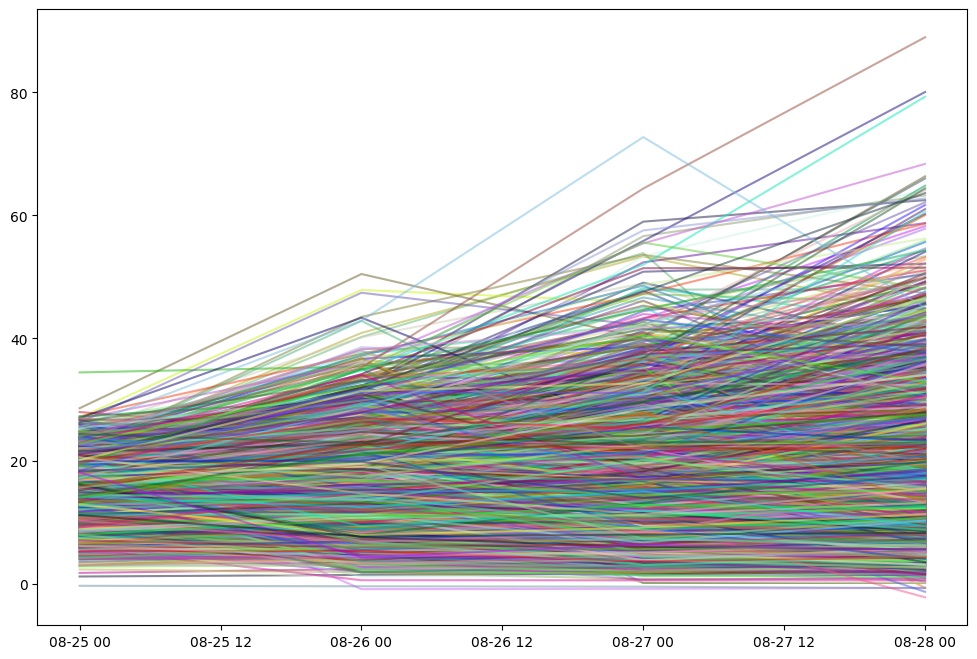

In [577]:
plt.figure(figsize=(12,8))
for i in range(0, mc_sims):
    plt.plot(dates, simulations[i], alpha=0.5, color=np.random.rand(3,))

plt.show()

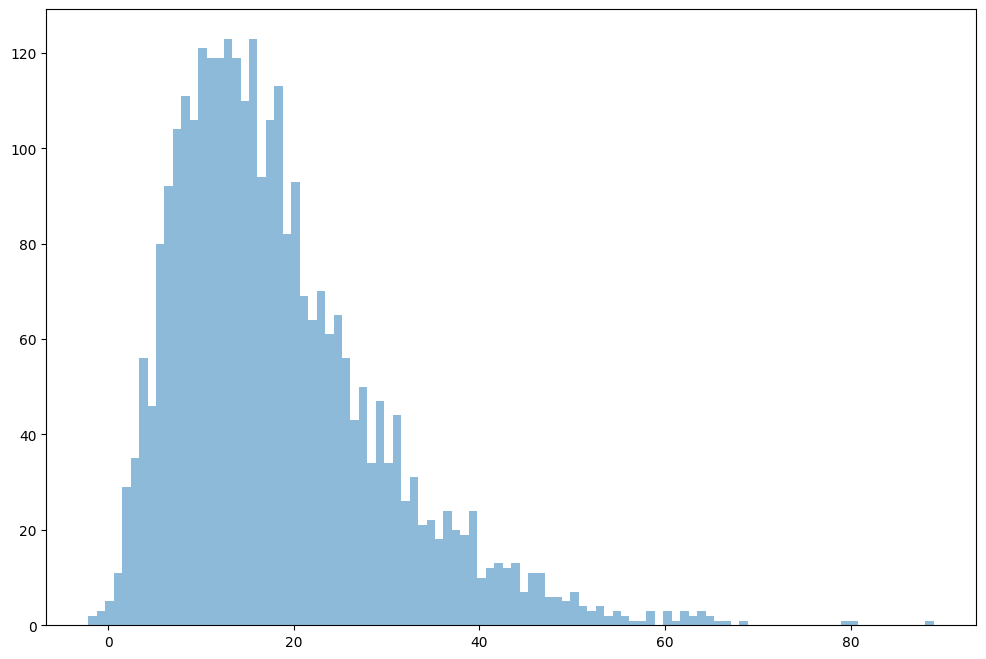

In [583]:
plt.figure(figsize=(12,8))

plt.hist(simulations[:,-1], bins=100,alpha=0.5)

plt.show()